In [132]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [133]:
data = pd.read_csv("car.data")  # Load the dataset

print(data.dtypes) # Check the data types

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


In [134]:
# Encode categorical features
le = LabelEncoder()  # Initialize the LabelEncoder
for column in data.columns:  # Loop through each column in the dataset
    data[column] = le.fit_transform(data[column])  # Encode the categorical values in the column

# Print the first few rows to verify encoding
print(data.head())  # Display the first few rows of the encoded dataset


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [135]:
# Split the dataset into features and labels
X = data.iloc[:, :-1]  # All columns except the last one (features)
y = data.iloc[:, -1]   # The last column (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% training, 20% testing

# Feature scaling
sc_x = StandardScaler()  # Initialize the StandardScaler
X_train = sc_x.fit_transform(X_train)  # Fit and transform the training data
X_test = sc_x.transform(X_test)  # Transform the test data

# Determine the optimal K value
import math
k_value = int(math.sqrt(len(y_test)))  # Calculate the approximate optimal K value
print(f"Optimal K value (approx): {k_value}")

# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')  # Initialize KNN with K=11 and Euclidean distance
classifier.fit(X_train, y_train)  # Fit the model to the training data

# Predict the test results
y_pred = classifier.predict(X_test)  # Make predictions on the test data


Optimal K value (approx): 18


In [136]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 71   0   8   0]
 [ 15   2   0   0]
 [ 14   0 226   0]
 [  4   0   0   6]]
F1 Score: 0.870636570260634
Accuracy Score: 0.8815028901734104


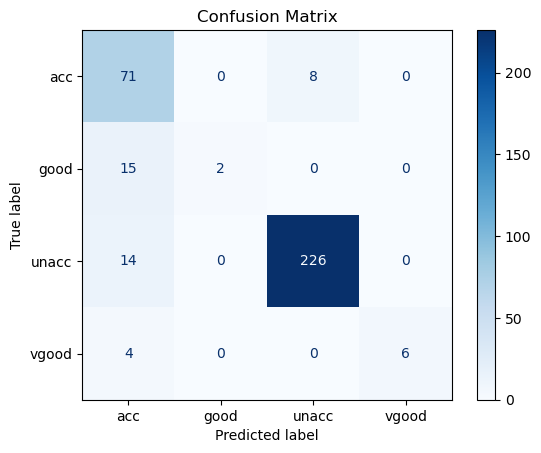

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)  # Create confusion matrix display with class labels
disp.plot(cmap='Blues')  # Plot the confusion matrix with a blue color map
plt.title('Confusion Matrix')  # Set the title for the plot
plt.show()  # Display the confusion matrix plot


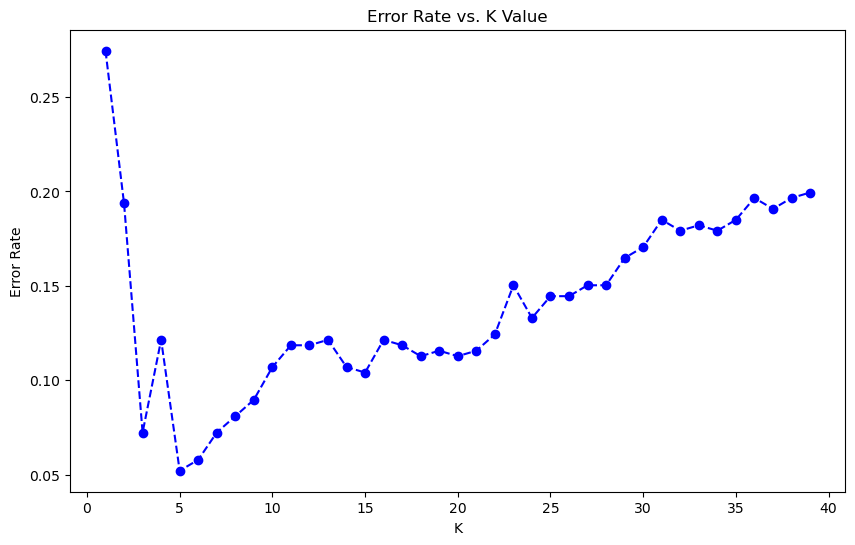

In [138]:
error_rates = []  # Initialize a list to store error rates

# Try different K values
for i in range(1, 40):  # Loop through K values from 1 to 39
    knn = KNeighborsClassifier(n_neighbors=i)  # Initialize KNN with the current K value
    knn.fit(X_train, y_train)  # Fit the model to the training data
    y_pred_i = knn.predict(X_test)  # Predict on the test data
    error_rates.append(np.mean(y_pred_i != y_test))  # Calculate the error rate and append to the list

# Plot the error rates
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(range(1, 40), error_rates, marker='o', linestyle='dashed', color='blue')  # Plot error rates vs. K values
plt.title('Error Rate vs. K Value')  # Set the plot title
plt.xlabel('K')  # Label the x-axis
plt.ylabel('Error Rate')  # Label the y-axis
plt.show()  # Display the plot


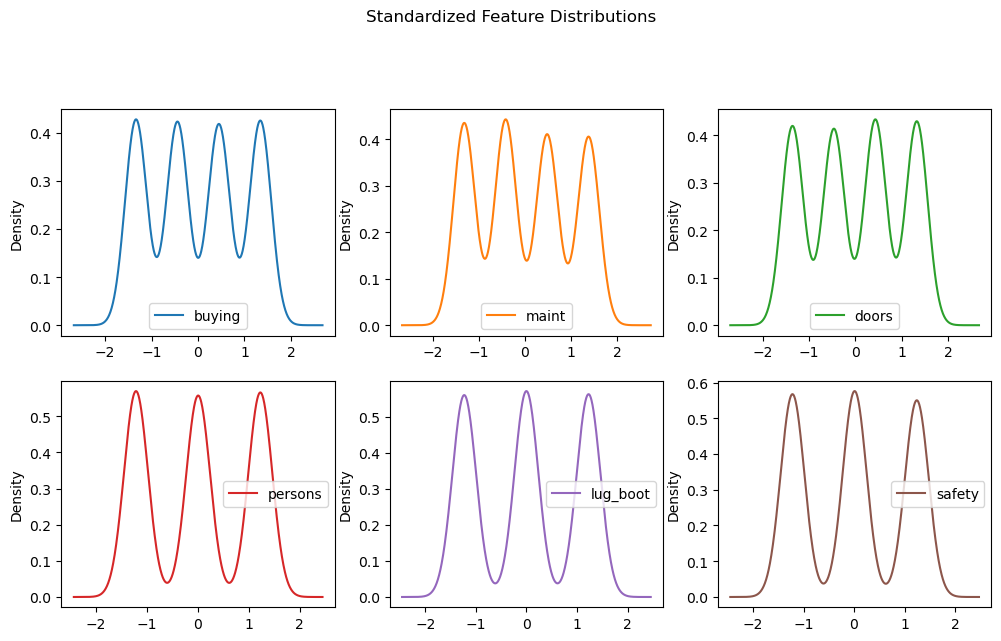

In [139]:
# Convert the scaled data back to a DataFrame for easier plotting
scaled_features = pd.DataFrame(X_train, columns=data.columns[:-1])

# Plot distributions
scaled_features.plot(kind='density', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False)  # Plot density distributions for each feature
plt.suptitle('Standardized Feature Distributions')  # Set the overall title for the subplots
plt.show()  # Display the plots
